In [2]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [6]:
y = y.flatten()

In [110]:
X.shape, y.shape

((10240000, 3), (10000,))

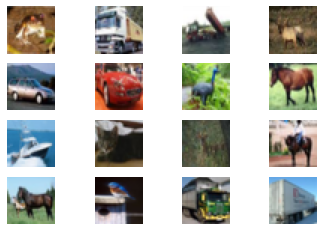

In [8]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [9]:
X.shape, y.shape

((60000, 32, 32, 3), (60000,))

In [10]:
X = X[:10000]
y = y[:10000]

In [106]:
X.size

30720000

In [11]:
X = X.reshape((10000*32*32,3))
X.shape

(10240000, 3)

In [12]:
kmeans = KMeans(n_clusters=32,random_state=0)
kmeans = kmeans.fit(X)

In [13]:
kmeans.cluster_centers_

array([[ 90.99221472, 113.80686872,  49.40439309],
       [161.16147949, 168.63153147, 174.72131398],
       [128.35695537, 129.00340886, 124.60989576],
       [ 64.17680986,  54.61078317,  34.13084328],
       [210.66492702, 209.51086605, 207.32922928],
       [204.49784739, 178.40040958, 106.05900103],
       [112.91004212, 108.87742972,  95.78907318],
       [249.65789992, 250.43069545, 249.81493498],
       [ 71.36623383,  71.43130244,  63.48211899],
       [194.54265173, 128.59363438,  70.0800119 ],
       [125.99453251, 169.43875433, 215.39999083],
       [185.42199023, 169.93209848, 148.27587044],
       [130.12566485, 151.35895883,  76.56569463],
       [102.40723831,  85.33798812,  66.03857925],
       [115.79006315, 141.16198737, 167.34041589],
       [ 12.23699861,  11.3613691 ,  10.84310768],
       [ 60.52881349, 123.23481929, 182.7838391 ],
       [107.0764837 ,  55.29439775,  33.3199337 ],
       [227.69901752, 230.1574289 , 229.58273162],
       [146.39959934, 122.21440

In [14]:
X_new = X

In [15]:
X.shape

(10240000, 3)

In [16]:
for i in range(len(X)):
    X_new[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

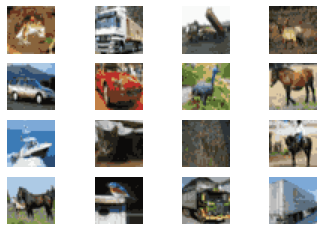

In [17]:
X_viz = X_new.reshape((10000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [18]:
from keras import utils as np_utils
y_N = keras.utils.np_utils.to_categorical(kmeans.labels_).reshape((10000,32,32,32))

In [19]:
X = X.reshape((10000,32,32,3))
X_N = []
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())
X_N = np.array(X_N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.


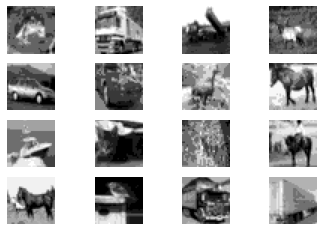

In [20]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [120]:
X_N.shape

(10000, 32, 32)

In [21]:
X_N = X_N.reshape((10000,32,32,1))
X_N.shape, y_N.shape

((10000, 32, 32, 1), (10000, 32, 32, 32))

In [22]:
X_train = X_N[0:9984]
y_train = y_N[0:9984]
X_test = X_N[-16:]
y_test = y_N[-16:]
X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 32, 32, 1), (10000, 32, 32, 32), (16, 32, 32, 1), (16, 32, 32, 32))

In [23]:
cnn = Sequential()
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,1)))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(32, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 dense (Dense)               (None, 32, 32, 64)        4160      
                                                                 
 dense_1 (Dense)             (None, 32, 32, 32)        2

In [1]:
cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=100, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: ignored

In [1]:
predictions = cnn.predict(X_test)
predictions.shape

NameError: ignored

In [94]:
predictions = predictions.reshape((16384,32))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()
pred = pred.reshape((16,32,32,3))

In [32]:
y_test.shape

(16, 32, 32, 12)

In [95]:
real = y_test.reshape((16384,32))
yy = real[:, 0:3]
for i in range(len(real)):
  yy[i] = kmeans.cluster_centers_[np.argmax(real[i])].tolist()
yy = yy.reshape((16,32,32,3))

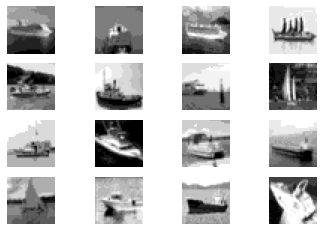

In [96]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr, cmap='gray')
    plt.axis('off')
plt.show()

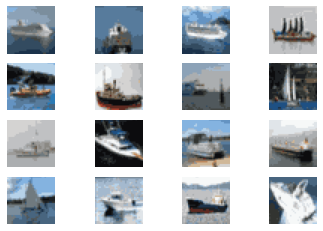

In [97]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = yy[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()

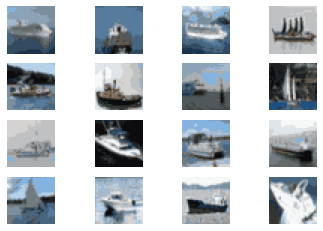

In [98]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()